# QPAD result visualization

In [1]:
import json
from collections import OrderedDict
from importlib import reload
import helper
from helper import *
import numpy as np
import matplotlib.pyplot as plt
import pyVisQP
dirname = '..'

## Raw beam data analysis

In [2]:
ndump = 20
first_file_number = 0
last_file_number = 0
half_thickness = 5
beam_number = 1
zVisualizeCenter = 0

In [6]:
pyVisQP = reload(pyVisQP)
# You cannot have any comment in qpinput.json !!!
parameters = pyVisQP.analyze_raw_beam_data(first_file_number = first_file_number,last_file_number = last_file_number,
                                            ndump = ndump,beam_number = beam_number, zVisualizeCenter = zVisualizeCenter, half_thickness = half_thickness)
with open('parameters_beam'+str(beam_number)+'_'+str(half_thickness)+'sigmaz'+'.json','w') as f:
    json.dump(parameters,f,indent=4)

In file ../Beam1/Raw/raw_00000000.h5, analyzing  100.0 % particles


In [4]:
parameters['sigma_x'][0]

0.006000436441596147

## Visualize the raw beam data

In [4]:
with open('parameters_beam'+str(beam_number)+'_'+str(half_thickness)+'sigmaz'+'.json') as f:
    parameters = json.load(f,object_pairs_hook=OrderedDict)

# $$\epsilon_n$$

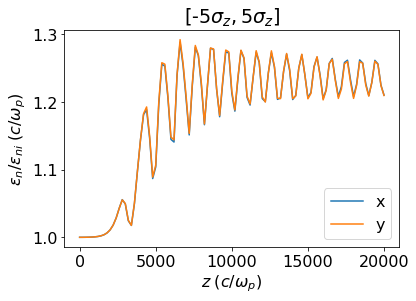

In [33]:
pyVisQP = reload(pyVisQP)

# fig, ax = plt.subplots()
plt.plot(parameters['s'], parameters['epsilon_n_x']/np.float64(parameters['epsilon_n_x'][0]),label='x')
plt.plot(parameters['s'], parameters['epsilon_n_y']/np.float64(parameters['epsilon_n_y'][0]),label='y')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\epsilon_n / \epsilon_{ni}  \;(c/\omega_p)$')
# plt.ylim([0.99,1.01])
if half_thickness == 1:
    plt.title(r'$[-\sigma_z,\sigma_z]$')
else:
    plt.title('[-'+str(half_thickness)+r'$\sigma_z,$'+str(half_thickness)+r'$\sigma_z]$')
plt.legend(loc='lower right')
plt.rcParams.update({'font.size': 16})
plt.savefig('beam'+str(beam_number)+'_emitn_'+str(half_thickness)+'sigmaz'+'.png')
plt.show()

# Plasma ramp data

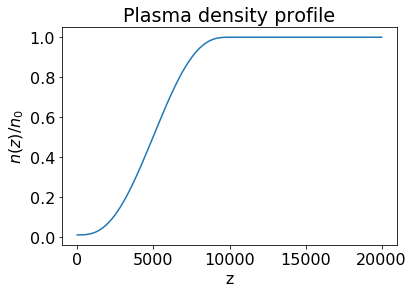

In [34]:
helper = reload(helper)
s, fs = get_density_profile(name = 'species', idx=0, plot=True, save=True, path = '..')
matched_parameters = get_matched_beam_parameters(i = 1,name = 'species',idx = 0,path = '..')

# $$\beta$$

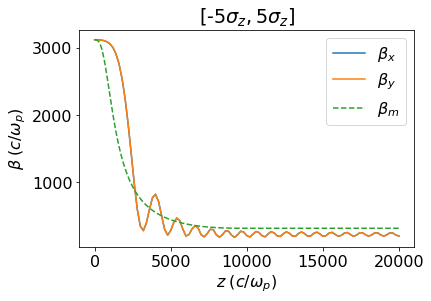

In [38]:
plot_beta_m = True
plt.plot(parameters['s'], parameters['beta_x'],label=r'$\beta_x$')
plt.plot(parameters['s'], parameters['beta_y'],label=r'$\beta_y$')
if plot_beta_m:
    plt.plot(matched_parameters['s'],matched_parameters['beta_m'],'--',label=r'$\beta_m$')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel(r'$\beta \;(c/\omega_p)$')
if half_thickness == 1:
    plt.title(r'$[-\sigma_z,\sigma_z]$')
else:
    plt.title('[-'+str(half_thickness)+r'$\sigma_z,$'+str(half_thickness)+r'$\sigma_z]$')
plt.legend(loc='best')
plt.rcParams.update({'font.size': 16})
temp = '_with_beta_m' if plot_beta_m else ''
plt.savefig('beam'+str(beam_number)+'_beta_'+str(half_thickness)+'sigmaz'+temp+'.png')
plt.show()

# $$\sigma$$

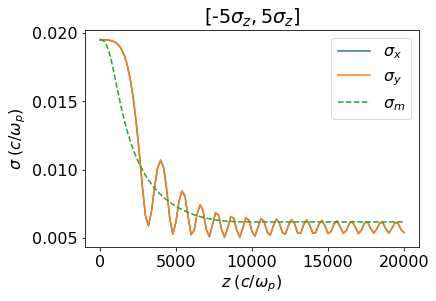

In [39]:
plot_sigma_m = True
plt.plot(parameters['s'], parameters['sigma_x'],label=r'$\sigma_x$')
plt.plot(parameters['s'], parameters['sigma_y'],label=r'$\sigma_y$')
if plot_sigma_m:
    plt.plot(matched_parameters['s'],matched_parameters['sigma_m'],'--',label=r'$\sigma_m$')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel(r'$\sigma \;(c/\omega_p)$')
if half_thickness == 1:
    plt.title(r'$[-\sigma_z,\sigma_z]$')
else:
    plt.title('[-'+str(half_thickness)+r'$\sigma_z,$'+str(half_thickness)+r'$\sigma_z]$')
plt.legend(loc='best')
plt.rcParams.update({'font.size': 16})
temp = '_with_sigma_m' if plot_sigma_m else ''
plt.savefig('beam'+str(beam_number)+'_sigma_'+str(half_thickness)+'sigmaz'+temp+'.png')
plt.show()

# $$\alpha$$

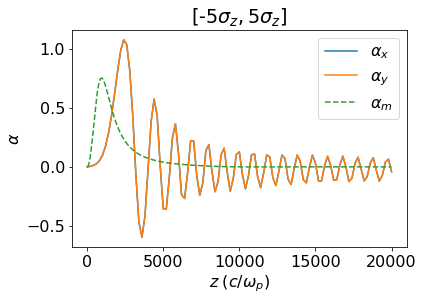

In [40]:
plot_alpha_m = True
plt.plot(parameters['s'], parameters['alpha_x'],label=r'$\alpha_x$')
plt.plot(parameters['s'], parameters['alpha_y'],label=r'$\alpha_y$')
if plot_alpha_m:
    plt.plot(matched_parameters['s'],matched_parameters['alpha_m'],'--',label=r'$\alpha_m$')
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel(r'$\alpha$')
plt.legend(loc='best')
if half_thickness == 1:
    plt.title(r'$[-\sigma_z,\sigma_z]$')
else:
    plt.title('[-'+str(half_thickness)+r'$\sigma_z,$'+str(half_thickness)+r'$\sigma_z]$')
plt.rcParams.update({'font.size': 16})
temp = '_with_alpha_m' if plot_sigma_m else ''
plt.savefig('beam'+str(beam_number)+'_alpha_'+str(half_thickness)+'sigmaz'+temp+'.png')
plt.show()

# energy: $\gamma$

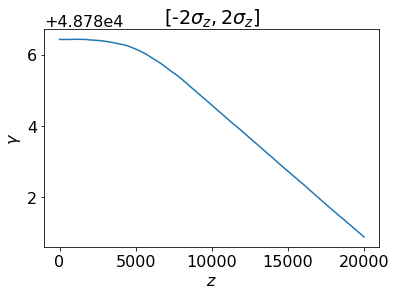

In [19]:
plt.plot(parameters['s'], parameters['energy'])
plt.xlabel('$z$')
plt.ylabel(r'$\gamma$')
if half_thickness == 1:
    plt.title(r'$[-\sigma_z,\sigma_z]$')
else:
    plt.title('[-'+str(half_thickness)+r'$\sigma_z,$'+str(half_thickness)+r'$\sigma_z]$')
plt.rcParams.update({'font.size': 16})
plt.savefig('beam'+str(beam_number)+'_energy_'+str(half_thickness)+'sigmaz'+'.png')
plt.show()

# energy spread: $\delta_\gamma / \gamma$

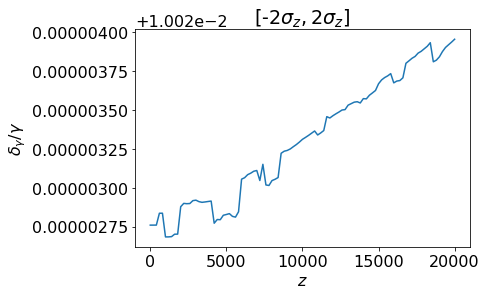

In [20]:
plt.plot(parameters['s'], parameters['energy_spread'])
plt.xlabel('$z$')
plt.ylabel(r'$\delta_\gamma / \gamma$')
if half_thickness == 1:
    plt.title(r'$[-\sigma_z,\sigma_z]$')
else:
    plt.title('[-'+str(half_thickness)+r'$\sigma_z,$'+str(half_thickness)+r'$\sigma_z]$')
plt.rcParams.update({'font.size': 16})
plt.savefig('beam'+str(beam_number)+'_energyspread_'+str(half_thickness)+'sigmaz'+'.png')
plt.show()

# $$d\gamma/dz$$

In [13]:
dgamma_dz_simulation = pyVisQP.NDiff1D(parameters['s'],parameters['energy'])

# Check Mike litos's theory
G0 = 1.18 # This parameter can be changed
n_sqrt = np.sqrt(n)
dgamma_dz_mike = G0 * n_sqrt * (2 * n_sqrt - 1)
plt.plot(parameters['s'],dgamma_dz_simulation,label='QPAD')
plt.plot(z,dgamma_dz_mike,label=r'$G_0\sqrt{\frac{n_p(z)}{n_{p0}}}(2\sqrt{\frac{n_p(z)}{n_{p0}}}-1)$')
plt.xlabel('z')
plt.ylabel(r'$\frac{d\gamma}{dz}$')
if half_thickness == 1:
    plt.title(r'$[-\sigma_z,\sigma_z]$')
else:
    plt.title('[-'+str(half_thickness)+r'$\sigma_z,$'+str(half_thickness)+r'$\sigma_z]$')
plt.legend(loc='best')
plt.rcParams.update({'font.size': 16})
plt.savefig('beam'+str(beam_number)+'_dgamma_dz_'+str(half_thickness)+'sigmaz'+'.png')
plt.show()


NameError: name 'n' is not defined

### Plot the emittance evolution for multiple slices in witness beam

In [ ]:
pyVisQP = reload(pyVisQP)

xi_s = [-1,-0.5,0,0.5,1]
half_thickness = 0.005

parameters_xi_s = [] 

for xi in xi_s:
    parameters_xi = pyVisQP.analyze_beam_data_QPAD_profile1(first_file_number = first_file_number,last_file_number = last_file_number,
                                            ndump = ndump,beam_number = 2, zVisualizeCenter = xi, half_thickness = half_thickness)
    parameters_xi_s.append(parameters_xi)

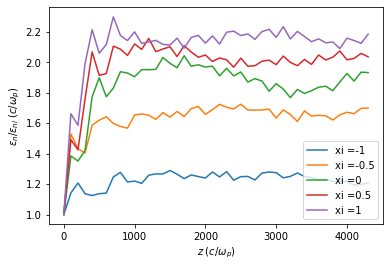

In [34]:
pyVisQP = reload(pyVisQP)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(xi_s)):
    plt.plot(parameters_xi_s[i]['s'], parameters_xi_s[i]['epsilon_n_x']/parameters_xi_s[i]['epsilon_n_x'][0],label='xi =' + str(xi_s[i]) )
plt.xlabel('$z\;(c/\omega_p)$')
plt.ylabel('$\epsilon_n / \epsilon_{ni}  \;(c/\omega_p)$')
plt.legend(loc='best')
plt.rcParams.update({'font.size': 10})
fig.savefig('beam'+str(beam_number)+'_emitn_slices.png', format='png')
plt.show()

## 1. Plasma and beam density
### angle = 0 (xz plane)

In [ ]:
angle = 0

# Plot the charge density of plasma and beam
filename1 = dirname +'/Species1/Charge/Merged_angle_'+ str(angle) +'/charge_'+str(ndump).zfill(8)+'.h5'
filename2 = dirname +'/Beam1/Charge/Merged_angle_'+ str(angle) +'/charge_'+str(ndump).zfill(8)+'.h5'
filename3 = dirname +'/Beam2/Charge/Merged_angle_'+ str(angle) +'/charge_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename1,filename2,filename3]
scaleList = [1,1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = None)

### angle = 90 (yz plane)

In [ ]:
# Plot the y component of the focusing force : Fy with transverse and longitudinal lineout
filename1 = dirname + '/Fields/Er/Merged_angle_'+ str(angle) +'/er_'+str(ndump).zfill(8)+'.h5'
filename2 = dirname + '/Fields/Bphi/Merged_angle_'+ str(angle) +'/bphi_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename1,filename2]
scaleList = [-1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'transverse',specify_title = '$F_x \; [mc\omega_p]$',Show_theory = 'focus')
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'longitudinal',specify_title = '$F_x \; [mc\omega_p]$',Show_theory = 'focus')

## 2. Accelerating field: $E_z$
### angle = 0 (xz plane)

In [ ]:
angle = 0
# Plot the accelerating field with transverse and longitudinal lineout
filename = dirname +'/Fields/Ez/Merged_angle_'+ str(angle) +'/ez_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename]
pyVisQP.makeplot(filenameList,LineoutDir = 'longitudinal',specify_title = '$E_z \; [mc\omega_p / e]$')
pyVisQP.makeplot(filenameList,LineoutDir = 'transverse',specify_title = '$E_z \; [mc\omega_p / e]$')

### angle = 90 (yz plane)

In [ ]:
angle = 90
# Plot the accelerating field with transverse and longitudinal lineout
filename = dirname +'/Fields/Ez/Merged_angle_'+ str(angle) +'/ez_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename]
pyVisQP.makeplot(filenameList,LineoutDir = 'longitudinal',specify_title = '$E_z \; [mc\omega_p / e]$')
pyVisQP.makeplot(filenameList,LineoutDir = 'transverse',specify_title = '$E_z \; [mc\omega_p / e]$')

## 3. Focusing force
### angle = 0 (xz plane)

In [ ]:
angle = 0

In [ ]:
# Plot the x component of the focusing force : Fx with transverse and longitudinal lineout
filename1 = dirname + '/Fields/Er/Merged_angle_'+ str(angle) +'/er_'+str(ndump).zfill(8)+'.h5'
filename2 = dirname + '/Fields/Bphi/Merged_angle_'+ str(angle) +'/bphi_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename1,filename2]
scaleList = [-1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'transverse',specify_title = '$F_x \; [mc\omega_p]$',Show_theory = 'focus')
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'longitudinal',specify_title = '$F_x \; [mc\omega_p]$',Show_theory = 'focus')

### angle = 90 (yz plane)

In [ ]:
angle = 90

In [ ]:
# Plot the y component of the focusing force : Fy with transverse and longitudinal lineout
filename1 = dirname + '/Fields/Er/Merged_angle_'+ str(angle) +'/er_'+str(ndump).zfill(8)+'.h5'
filename2 = dirname + '/Fields/Bphi/Merged_angle_'+ str(angle) +'/bphi_'+str(ndump).zfill(8)+'.h5'
filenameList = [filename1,filename2]
scaleList = [-1,1]
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'transverse',specify_title = '$F_y \; [mc\omega_p]$',Show_theory = 'focus')
pyVisQP.makeplot(filenameList,scaleList,LineoutDir = 'longitudinal',specify_title = '$F_y \; [mc\omega_p]$',Show_theory = 'focus')

In [2]:
matched_parameters = get_matched_beam_parameters(i = 1,name = 'species',idx = 0,path = '..')

In [3]:
matched_parameters['sigma_m'][0]

0.018606501897257332